Packages

In [3]:
# base tools
import os, sys
#sys.path.append(os.path.join(".."))

# data analysis
import numpy as np
from numpy.linalg import norm
from tqdm import tqdm # gives a progress bar which is nice and easy to understand. 

# tensorflow
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import (load_img, 
                                                  img_to_array)
from tensorflow.keras.applications.vgg16 import (VGG16, 
                                                 preprocess_input)
# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# utils feature extraction
import sys
sys.path.append("..") #"." for .py
import utils.features as fe


2023-05-10 13:36:01.606884: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Helperfunction (Ross') -> extract features from images

In [4]:
def extract_features(img_path, model):
    """
    Extract features from image data using pretrained model (e.g. VGG16)
    """
    # Define input image shape - remember we need to reshape
    input_shape = (224, 224, 3) # the shape is set to match the images in the "Cultural Heritage Dataset"
    # load image from file path
    img = load_img(img_path, target_size=(input_shape[0], 
                                          input_shape[1]))
    # convert to array
    img_array = img_to_array(img)
    # expand to fit dimensions
    expanded_img_array = np.expand_dims(img_array, axis=0)
    # preprocess image - see last week's notebook
    preprocessed_img = preprocess_input(expanded_img_array)
    # use the predict function to create feature representation
    features = model.predict(preprocessed_img)
    # flatten
    flattened_features = features.flatten()
    # normalise features
    normalized_features = flattened_features / norm(features) # norm is from numpy --> a slightly more sophisticated type of normalization than just deviding by 255 (but the latter could also be done). 
    return normalized_features

Load VGG16

In [5]:
# load VGG16
model = VGG16(weights='imagenet', 
              include_top=False, # Fals = doesn't include classifier layer
              pooling='avg',
              input_shape=(224, 224, 3))

In [6]:
#path to the whole datasets
root_dir = os.path.join("..", "in", "Orthodox_Churches", "Frescoes")
filenames = [root_dir+"/"+name for name in sorted(os.listdir(root_dir))]

In [7]:
# create list of features
feature_list = []
for i in tqdm(range(len(filenames)), position=0, leave=True):
    feature_list.append(extract_features(filenames[i], model))

  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 273ms/step


  0%|          | 1/200 [00:00<01:07,  2.95it/s]

1/1 [==============================] - 0s 88ms/step


  1%|          | 2/200 [00:00<00:42,  4.67it/s]

1/1 [==============================] - 0s 86ms/step


  2%|▏         | 3/200 [00:00<00:34,  5.76it/s]

1/1 [==============================] - 0s 85ms/step


  2%|▏         | 4/200 [00:00<00:30,  6.49it/s]

1/1 [==============================] - 0s 81ms/step


  2%|▎         | 5/200 [00:00<00:27,  7.01it/s]

1/1 [==============================] - 0s 81ms/step


  3%|▎         | 6/200 [00:00<00:26,  7.41it/s]

1/1 [==============================] - 0s 82ms/step


  4%|▎         | 7/200 [00:01<00:25,  7.72it/s]

1/1 [==============================] - 0s 78ms/step


  4%|▍         | 8/200 [00:01<00:23,  8.04it/s]

1/1 [==============================] - 0s 85ms/step


  4%|▍         | 9/200 [00:01<00:23,  8.08it/s]

1/1 [==============================] - 0s 90ms/step


  5%|▌         | 10/200 [00:01<00:23,  8.00it/s]

1/1 [==============================] - 0s 82ms/step


  6%|▌         | 11/200 [00:01<00:23,  8.02it/s]

1/1 [==============================] - 0s 82ms/step


  6%|▌         | 12/200 [00:01<00:23,  8.07it/s]

1/1 [==============================] - 0s 81ms/step


  6%|▋         | 13/200 [00:01<00:23,  8.12it/s]

1/1 [==============================] - 0s 87ms/step


  7%|▋         | 14/200 [00:01<00:23,  8.07it/s]

1/1 [==============================] - 0s 84ms/step


  8%|▊         | 15/200 [00:02<00:23,  8.00it/s]

1/1 [==============================] - 0s 80ms/step


  8%|▊         | 16/200 [00:02<00:22,  8.10it/s]

1/1 [==============================] - 0s 77ms/step


  8%|▊         | 17/200 [00:02<00:22,  8.29it/s]

1/1 [==============================] - 0s 80ms/step


  9%|▉         | 18/200 [00:02<00:21,  8.41it/s]

1/1 [==============================] - 0s 78ms/step


 10%|▉         | 19/200 [00:02<00:21,  8.49it/s]

1/1 [==============================] - 0s 78ms/step


 10%|█         | 20/200 [00:02<00:21,  8.54it/s]

1/1 [==============================] - 0s 84ms/step


 10%|█         | 21/200 [00:02<00:21,  8.36it/s]

1/1 [==============================] - 0s 77ms/step


 11%|█         | 22/200 [00:02<00:21,  8.43it/s]

1/1 [==============================] - 0s 81ms/step


 12%|█▏        | 23/200 [00:03<00:21,  8.39it/s]

1/1 [==============================] - 0s 80ms/step


 12%|█▏        | 24/200 [00:03<00:21,  8.09it/s]

1/1 [==============================] - 0s 85ms/step


 12%|█▎        | 25/200 [00:03<00:21,  8.10it/s]

1/1 [==============================] - 0s 87ms/step


 13%|█▎        | 26/200 [00:03<00:21,  8.02it/s]

1/1 [==============================] - 0s 92ms/step


 14%|█▎        | 27/200 [00:03<00:21,  7.93it/s]

1/1 [==============================] - 0s 110ms/step


 14%|█▍        | 28/200 [00:03<00:24,  7.08it/s]

1/1 [==============================] - 0s 77ms/step


 14%|█▍        | 29/200 [00:03<00:23,  7.40it/s]

1/1 [==============================] - 0s 83ms/step


 15%|█▌        | 30/200 [00:03<00:22,  7.62it/s]

1/1 [==============================] - 0s 81ms/step


 16%|█▌        | 31/200 [00:04<00:21,  7.79it/s]

1/1 [==============================] - 0s 77ms/step


 16%|█▌        | 32/200 [00:04<00:21,  8.00it/s]

1/1 [==============================] - 0s 77ms/step


 16%|█▋        | 33/200 [00:04<00:21,  7.91it/s]

1/1 [==============================] - 0s 82ms/step


 17%|█▋        | 34/200 [00:04<00:20,  7.97it/s]

1/1 [==============================] - 0s 92ms/step


 18%|█▊        | 35/200 [00:04<00:21,  7.81it/s]

1/1 [==============================] - 0s 77ms/step


 18%|█▊        | 36/200 [00:04<00:20,  7.99it/s]

1/1 [==============================] - 0s 79ms/step


 18%|█▊        | 37/200 [00:04<00:20,  8.11it/s]

1/1 [==============================] - 0s 90ms/step


 19%|█▉        | 38/200 [00:04<00:20,  7.98it/s]

1/1 [==============================] - 0s 85ms/step


 20%|█▉        | 39/200 [00:05<00:20,  7.95it/s]

1/1 [==============================] - 0s 91ms/step


 20%|██        | 40/200 [00:05<00:20,  7.82it/s]

1/1 [==============================] - 0s 83ms/step


 20%|██        | 41/200 [00:05<00:19,  7.99it/s]

1/1 [==============================] - 0s 80ms/step


 21%|██        | 42/200 [00:05<00:19,  8.05it/s]

1/1 [==============================] - 0s 84ms/step


 22%|██▏       | 43/200 [00:05<00:19,  7.93it/s]

1/1 [==============================] - 0s 90ms/step


 22%|██▏       | 44/200 [00:05<00:19,  7.92it/s]

1/1 [==============================] - 0s 90ms/step


 22%|██▎       | 45/200 [00:05<00:19,  7.89it/s]

1/1 [==============================] - 0s 93ms/step


 23%|██▎       | 46/200 [00:05<00:19,  7.82it/s]

1/1 [==============================] - 0s 80ms/step


 24%|██▎       | 47/200 [00:06<00:19,  7.97it/s]

1/1 [==============================] - 0s 80ms/step


 24%|██▍       | 48/200 [00:06<00:18,  8.05it/s]

1/1 [==============================] - 0s 87ms/step


 24%|██▍       | 49/200 [00:06<00:18,  8.03it/s]

1/1 [==============================] - 0s 88ms/step


 25%|██▌       | 50/200 [00:06<00:18,  7.95it/s]

1/1 [==============================] - 0s 88ms/step


 26%|██▌       | 51/200 [00:06<00:18,  7.84it/s]

1/1 [==============================] - 0s 89ms/step


 26%|██▌       | 52/200 [00:06<00:19,  7.73it/s]

1/1 [==============================] - 0s 81ms/step


 26%|██▋       | 53/200 [00:06<00:18,  7.95it/s]

1/1 [==============================] - 0s 86ms/step


 27%|██▋       | 54/200 [00:06<00:18,  7.80it/s]

1/1 [==============================] - 0s 78ms/step


 28%|██▊       | 55/200 [00:07<00:18,  8.05it/s]

1/1 [==============================] - 0s 84ms/step


 28%|██▊       | 56/200 [00:07<00:17,  8.02it/s]

1/1 [==============================] - 0s 84ms/step


 28%|██▊       | 57/200 [00:07<00:18,  7.89it/s]

1/1 [==============================] - 0s 83ms/step


 29%|██▉       | 58/200 [00:07<00:17,  7.96it/s]

1/1 [==============================] - 0s 81ms/step


 30%|██▉       | 59/200 [00:07<00:17,  8.06it/s]

1/1 [==============================] - 0s 95ms/step


 30%|███       | 60/200 [00:07<00:18,  7.78it/s]

1/1 [==============================] - 0s 91ms/step


 30%|███       | 61/200 [00:07<00:18,  7.53it/s]

1/1 [==============================] - 0s 79ms/step


 31%|███       | 62/200 [00:07<00:17,  7.74it/s]

1/1 [==============================] - 0s 78ms/step


 32%|███▏      | 63/200 [00:08<00:17,  8.02it/s]

1/1 [==============================] - 0s 85ms/step


 32%|███▏      | 64/200 [00:08<00:16,  8.02it/s]

1/1 [==============================] - 0s 82ms/step


 32%|███▎      | 65/200 [00:08<00:16,  8.07it/s]

1/1 [==============================] - 0s 81ms/step


 33%|███▎      | 66/200 [00:08<00:16,  8.12it/s]

1/1 [==============================] - 0s 79ms/step


 34%|███▎      | 67/200 [00:08<00:16,  8.26it/s]

1/1 [==============================] - 0s 80ms/step


 34%|███▍      | 68/200 [00:08<00:15,  8.27it/s]

1/1 [==============================] - 0s 83ms/step


 34%|███▍      | 69/200 [00:08<00:16,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 35%|███▌      | 70/200 [00:08<00:16,  7.91it/s]

1/1 [==============================] - 0s 77ms/step


 36%|███▌      | 71/200 [00:09<00:15,  8.07it/s]

1/1 [==============================] - 0s 83ms/step


 36%|███▌      | 72/200 [00:09<00:15,  8.10it/s]

1/1 [==============================] - 0s 80ms/step


 36%|███▋      | 73/200 [00:09<00:15,  8.22it/s]

1/1 [==============================] - 0s 86ms/step


 37%|███▋      | 74/200 [00:09<00:15,  8.11it/s]

1/1 [==============================] - 0s 93ms/step


 38%|███▊      | 75/200 [00:09<00:15,  7.91it/s]

1/1 [==============================] - 0s 85ms/step


 38%|███▊      | 76/200 [00:09<00:15,  7.85it/s]

1/1 [==============================] - 0s 92ms/step


 38%|███▊      | 77/200 [00:09<00:15,  7.80it/s]

1/1 [==============================] - 0s 78ms/step


 39%|███▉      | 78/200 [00:09<00:15,  7.85it/s]

1/1 [==============================] - 0s 77ms/step


 40%|███▉      | 79/200 [00:10<00:14,  8.07it/s]

1/1 [==============================] - 0s 80ms/step


 40%|████      | 80/200 [00:10<00:14,  8.09it/s]

1/1 [==============================] - 0s 77ms/step


 40%|████      | 81/200 [00:10<00:14,  8.32it/s]

1/1 [==============================] - 0s 91ms/step


 41%|████      | 82/200 [00:10<00:14,  7.88it/s]

1/1 [==============================] - 0s 79ms/step


 42%|████▏     | 83/200 [00:10<00:14,  8.04it/s]

1/1 [==============================] - 0s 79ms/step


 42%|████▏     | 84/200 [00:10<00:14,  7.95it/s]

1/1 [==============================] - 0s 75ms/step


 42%|████▎     | 85/200 [00:10<00:14,  7.95it/s]

1/1 [==============================] - 0s 82ms/step


 43%|████▎     | 86/200 [00:10<00:14,  8.05it/s]

1/1 [==============================] - 0s 78ms/step


 44%|████▎     | 87/200 [00:11<00:13,  8.15it/s]

1/1 [==============================] - 0s 76ms/step


 44%|████▍     | 88/200 [00:11<00:13,  8.35it/s]

1/1 [==============================] - 0s 81ms/step


 44%|████▍     | 89/200 [00:11<00:13,  8.36it/s]

1/1 [==============================] - 0s 79ms/step


 45%|████▌     | 90/200 [00:11<00:13,  8.33it/s]

1/1 [==============================] - 0s 85ms/step


 46%|████▌     | 91/200 [00:11<00:13,  8.23it/s]

1/1 [==============================] - 0s 80ms/step


 46%|████▌     | 92/200 [00:11<00:13,  8.29it/s]

1/1 [==============================] - 0s 88ms/step


 46%|████▋     | 93/200 [00:11<00:13,  8.22it/s]

1/1 [==============================] - 0s 77ms/step


 47%|████▋     | 94/200 [00:11<00:12,  8.41it/s]

1/1 [==============================] - 0s 96ms/step


 48%|████▊     | 95/200 [00:12<00:12,  8.12it/s]

1/1 [==============================] - 0s 89ms/step


 48%|████▊     | 96/200 [00:12<00:13,  7.83it/s]

1/1 [==============================] - 0s 81ms/step


 48%|████▊     | 97/200 [00:12<00:12,  7.93it/s]

1/1 [==============================] - 0s 79ms/step


 49%|████▉     | 98/200 [00:12<00:12,  8.14it/s]

1/1 [==============================] - 0s 82ms/step


 50%|████▉     | 99/200 [00:12<00:12,  8.16it/s]

1/1 [==============================] - 0s 81ms/step


 50%|█████     | 100/200 [00:12<00:12,  8.20it/s]

1/1 [==============================] - 0s 78ms/step


 50%|█████     | 101/200 [00:12<00:11,  8.32it/s]

1/1 [==============================] - 0s 98ms/step


 51%|█████     | 102/200 [00:12<00:12,  7.82it/s]

1/1 [==============================] - 0s 88ms/step


 52%|█████▏    | 103/200 [00:13<00:12,  7.79it/s]

1/1 [==============================] - 0s 81ms/step


 52%|█████▏    | 104/200 [00:13<00:12,  7.93it/s]

1/1 [==============================] - 0s 84ms/step


 52%|█████▎    | 105/200 [00:13<00:12,  7.82it/s]

1/1 [==============================] - 0s 81ms/step


 53%|█████▎    | 106/200 [00:13<00:11,  7.96it/s]

1/1 [==============================] - 0s 83ms/step


 54%|█████▎    | 107/200 [00:13<00:11,  7.94it/s]

1/1 [==============================] - 0s 82ms/step


 54%|█████▍    | 108/200 [00:13<00:11,  8.03it/s]

1/1 [==============================] - 0s 89ms/step


 55%|█████▍    | 109/200 [00:13<00:11,  7.63it/s]

1/1 [==============================] - 0s 94ms/step


 55%|█████▌    | 110/200 [00:13<00:12,  7.33it/s]

1/1 [==============================] - 0s 79ms/step


 56%|█████▌    | 111/200 [00:14<00:11,  7.60it/s]

1/1 [==============================] - 0s 90ms/step


 56%|█████▌    | 112/200 [00:14<00:11,  7.45it/s]

1/1 [==============================] - 0s 81ms/step


 56%|█████▋    | 113/200 [00:14<00:11,  7.72it/s]

1/1 [==============================] - 0s 80ms/step


 57%|█████▋    | 114/200 [00:14<00:10,  7.83it/s]

1/1 [==============================] - 0s 79ms/step


 57%|█████▊    | 115/200 [00:14<00:10,  8.03it/s]

1/1 [==============================] - 0s 88ms/step


 58%|█████▊    | 116/200 [00:14<00:10,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 58%|█████▊    | 117/200 [00:14<00:10,  7.71it/s]

1/1 [==============================] - 0s 80ms/step


 59%|█████▉    | 118/200 [00:14<00:10,  7.92it/s]

1/1 [==============================] - 0s 76ms/step


 60%|█████▉    | 119/200 [00:15<00:09,  8.19it/s]

1/1 [==============================] - 0s 81ms/step


 60%|██████    | 120/200 [00:15<00:09,  8.22it/s]

1/1 [==============================] - 0s 80ms/step


 60%|██████    | 121/200 [00:15<00:09,  8.24it/s]

1/1 [==============================] - 0s 82ms/step


 61%|██████    | 122/200 [00:15<00:09,  8.07it/s]

1/1 [==============================] - 0s 80ms/step


 62%|██████▏   | 123/200 [00:15<00:09,  8.04it/s]

1/1 [==============================] - 0s 83ms/step


 62%|██████▏   | 124/200 [00:15<00:09,  8.02it/s]

1/1 [==============================] - 0s 86ms/step


 62%|██████▎   | 125/200 [00:15<00:09,  7.84it/s]

1/1 [==============================] - 0s 85ms/step


 63%|██████▎   | 126/200 [00:15<00:09,  7.64it/s]

1/1 [==============================] - 0s 83ms/step


 64%|██████▎   | 127/200 [00:16<00:09,  7.75it/s]

1/1 [==============================] - 0s 86ms/step


 64%|██████▍   | 128/200 [00:16<00:09,  7.72it/s]

1/1 [==============================] - 0s 83ms/step


 64%|██████▍   | 129/200 [00:16<00:09,  7.84it/s]

1/1 [==============================] - 0s 79ms/step


 65%|██████▌   | 130/200 [00:16<00:08,  8.01it/s]

1/1 [==============================] - 0s 76ms/step


 66%|██████▌   | 131/200 [00:16<00:08,  8.23it/s]

1/1 [==============================] - 0s 85ms/step


 66%|██████▌   | 132/200 [00:16<00:08,  8.10it/s]

1/1 [==============================] - 0s 88ms/step


 66%|██████▋   | 133/200 [00:16<00:08,  7.75it/s]

1/1 [==============================] - 0s 94ms/step


 67%|██████▋   | 134/200 [00:16<00:08,  7.48it/s]

1/1 [==============================] - 0s 84ms/step


 68%|██████▊   | 135/200 [00:17<00:08,  7.53it/s]

1/1 [==============================] - 0s 78ms/step


 68%|██████▊   | 136/200 [00:17<00:08,  7.78it/s]

1/1 [==============================] - 0s 82ms/step


 68%|██████▊   | 137/200 [00:17<00:08,  7.76it/s]

1/1 [==============================] - 0s 78ms/step


 69%|██████▉   | 138/200 [00:17<00:07,  8.00it/s]

1/1 [==============================] - 0s 102ms/step


 70%|██████▉   | 139/200 [00:17<00:07,  7.72it/s]

1/1 [==============================] - 0s 94ms/step


 70%|███████   | 140/200 [00:17<00:08,  7.40it/s]

1/1 [==============================] - 0s 80ms/step


 70%|███████   | 141/200 [00:17<00:07,  7.61it/s]

1/1 [==============================] - 0s 83ms/step


 71%|███████   | 142/200 [00:18<00:07,  7.69it/s]

1/1 [==============================] - 0s 79ms/step


 72%|███████▏  | 143/200 [00:18<00:07,  7.90it/s]

1/1 [==============================] - 0s 82ms/step


 72%|███████▏  | 144/200 [00:18<00:07,  7.98it/s]

1/1 [==============================] - 0s 76ms/step


 72%|███████▎  | 145/200 [00:18<00:06,  8.21it/s]

1/1 [==============================] - 0s 82ms/step


 73%|███████▎  | 146/200 [00:18<00:06,  8.19it/s]

1/1 [==============================] - 0s 79ms/step


 74%|███████▎  | 147/200 [00:18<00:06,  8.34it/s]

1/1 [==============================] - 0s 79ms/step


 74%|███████▍  | 148/200 [00:18<00:06,  8.41it/s]

1/1 [==============================] - 0s 86ms/step


 74%|███████▍  | 149/200 [00:18<00:06,  8.25it/s]

1/1 [==============================] - 0s 79ms/step


 75%|███████▌  | 150/200 [00:18<00:06,  8.25it/s]

1/1 [==============================] - 0s 81ms/step


 76%|███████▌  | 151/200 [00:19<00:05,  8.24it/s]

1/1 [==============================] - 0s 76ms/step


 76%|███████▌  | 152/200 [00:19<00:05,  8.40it/s]

1/1 [==============================] - 0s 84ms/step


 76%|███████▋  | 153/200 [00:19<00:05,  8.37it/s]

1/1 [==============================] - 0s 78ms/step


 77%|███████▋  | 154/200 [00:19<00:05,  8.41it/s]

1/1 [==============================] - 0s 97ms/step


 78%|███████▊  | 155/200 [00:19<00:05,  7.86it/s]

1/1 [==============================] - 0s 77ms/step


 78%|███████▊  | 156/200 [00:19<00:05,  7.68it/s]

1/1 [==============================] - 0s 79ms/step


 78%|███████▊  | 157/200 [00:19<00:05,  7.88it/s]

1/1 [==============================] - 0s 79ms/step


 79%|███████▉  | 158/200 [00:19<00:05,  8.08it/s]

1/1 [==============================] - 0s 76ms/step


 80%|███████▉  | 159/200 [00:20<00:04,  8.22it/s]

1/1 [==============================] - 0s 82ms/step


 80%|████████  | 160/200 [00:20<00:04,  8.22it/s]

1/1 [==============================] - 0s 76ms/step


 80%|████████  | 161/200 [00:20<00:04,  8.41it/s]

1/1 [==============================] - 0s 86ms/step


 81%|████████  | 162/200 [00:20<00:04,  8.04it/s]

1/1 [==============================] - 0s 96ms/step


 82%|████████▏ | 163/200 [00:20<00:04,  7.91it/s]

1/1 [==============================] - 0s 79ms/step


 82%|████████▏ | 164/200 [00:20<00:04,  8.05it/s]

1/1 [==============================] - 0s 86ms/step


 82%|████████▎ | 165/200 [00:20<00:04,  7.85it/s]

1/1 [==============================] - 0s 76ms/step


 83%|████████▎ | 166/200 [00:20<00:04,  8.14it/s]

1/1 [==============================] - 0s 75ms/step


 84%|████████▎ | 167/200 [00:21<00:03,  8.37it/s]

1/1 [==============================] - 0s 78ms/step


 84%|████████▍ | 168/200 [00:21<00:03,  8.37it/s]

1/1 [==============================] - 0s 78ms/step


 84%|████████▍ | 169/200 [00:21<00:03,  8.49it/s]

1/1 [==============================] - 0s 92ms/step


 85%|████████▌ | 170/200 [00:21<00:03,  8.05it/s]

1/1 [==============================] - 0s 75ms/step


 86%|████████▌ | 171/200 [00:21<00:03,  8.31it/s]

1/1 [==============================] - 0s 77ms/step


 86%|████████▌ | 172/200 [00:21<00:03,  8.45it/s]

1/1 [==============================] - 0s 77ms/step


 86%|████████▋ | 173/200 [00:21<00:03,  8.48it/s]

1/1 [==============================] - 0s 79ms/step


 87%|████████▋ | 174/200 [00:21<00:03,  8.55it/s]

1/1 [==============================] - 0s 78ms/step


 88%|████████▊ | 175/200 [00:22<00:02,  8.55it/s]

1/1 [==============================] - 0s 75ms/step


 88%|████████▊ | 176/200 [00:22<00:02,  8.66it/s]

1/1 [==============================] - 0s 74ms/step


 88%|████████▊ | 177/200 [00:22<00:02,  8.60it/s]

1/1 [==============================] - 0s 85ms/step


 89%|████████▉ | 178/200 [00:22<00:02,  8.21it/s]

1/1 [==============================] - 0s 81ms/step


 90%|████████▉ | 179/200 [00:22<00:02,  8.28it/s]

1/1 [==============================] - 0s 95ms/step


 90%|█████████ | 180/200 [00:22<00:02,  7.81it/s]

1/1 [==============================] - 0s 78ms/step


 90%|█████████ | 181/200 [00:22<00:02,  8.06it/s]

1/1 [==============================] - 0s 79ms/step


 91%|█████████ | 182/200 [00:22<00:02,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 92%|█████████▏| 183/200 [00:23<00:02,  7.81it/s]

1/1 [==============================] - 0s 77ms/step


 92%|█████████▏| 184/200 [00:23<00:02,  7.92it/s]

1/1 [==============================] - 0s 75ms/step


 92%|█████████▎| 185/200 [00:23<00:01,  8.21it/s]

1/1 [==============================] - 0s 75ms/step


 93%|█████████▎| 186/200 [00:23<00:01,  8.33it/s]

1/1 [==============================] - 0s 78ms/step


 94%|█████████▎| 187/200 [00:23<00:01,  8.42it/s]

1/1 [==============================] - 0s 85ms/step


 94%|█████████▍| 188/200 [00:23<00:01,  8.19it/s]

1/1 [==============================] - 0s 89ms/step


 94%|█████████▍| 189/200 [00:23<00:01,  7.90it/s]

1/1 [==============================] - 0s 77ms/step


 95%|█████████▌| 190/200 [00:23<00:01,  8.17it/s]

1/1 [==============================] - 0s 76ms/step


 96%|█████████▌| 191/200 [00:23<00:01,  8.38it/s]

1/1 [==============================] - 0s 78ms/step


 96%|█████████▌| 192/200 [00:24<00:00,  8.51it/s]

1/1 [==============================] - 0s 75ms/step


 96%|█████████▋| 193/200 [00:24<00:00,  8.64it/s]

1/1 [==============================] - 0s 88ms/step


 97%|█████████▋| 194/200 [00:24<00:00,  8.23it/s]

1/1 [==============================] - 0s 82ms/step


 98%|█████████▊| 195/200 [00:24<00:00,  7.91it/s]

1/1 [==============================] - 0s 81ms/step


 98%|█████████▊| 196/200 [00:24<00:00,  4.83it/s]

1/1 [==============================] - 0s 85ms/step


 98%|█████████▊| 197/200 [00:24<00:00,  5.51it/s]

1/1 [==============================] - 0s 85ms/step


 99%|█████████▉| 198/200 [00:25<00:00,  6.08it/s]

1/1 [==============================] - 0s 81ms/step


100%|█████████▉| 199/200 [00:25<00:00,  6.63it/s]

1/1 [==============================] - 0s 83ms/step


100%|██████████| 200/200 [00:25<00:00,  7.89it/s]


In [8]:
# import NearestNeighbors
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=10, 
                             algorithm='brute',
                             metric='cosine').fit(feature_list)

In [9]:
distances, indices = neighbors.kneighbors([feature_list[149]]) # features from image number 149.

In [17]:
# return list of the five closest images (excluding the image itself)
most_similar = []
for i in range(1,6):
    dis = distances[0][i]
    ind = indices[0][i]
    print(distances[0][i], indices[0][i])
    most_similar.append(indices[0][i])

0.24944997 86
0.24989378 31
0.26896286 124
0.27435952 74
0.27937 73


In [18]:
most_similar

[86, 31, 124, 74, 73]

In [19]:
# Save list of the five closest images in out (as in assignment 1)
import pandas as pd
most_similar_df = pd.DataFrame(most_similar)
df_path = os.path.join("..", "out", "distance_metrix.csv")
most_similar_df.to_csv(df_path, index=False)

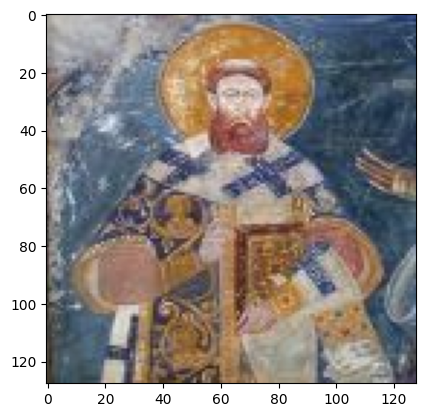

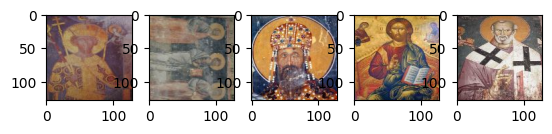

In [20]:
#Save plots

# plt target image
plt.imshow(mpimg.imread(filenames[149]))
outpath = os.path.join("..", "out", "target_image.png")
plt.savefig(outpath)

# plot 5 most similar images
f, axarr = plt.subplots(1,5)
axarr[0].imshow(mpimg.imread(filenames[most_similar[0]]))
axarr[1].imshow(mpimg.imread(filenames[most_similar[1]]))
axarr[2].imshow(mpimg.imread(filenames[most_similar[2]]))
axarr[3].imshow(mpimg.imread(filenames[most_similar[3]]))
axarr[4].imshow(mpimg.imread(filenames[most_similar[4]]))

outpath = os.path.join("..", "out", "similar_images.png")
plt.savefig(outpath)

## Image Classifier

In [21]:
# tf tools
import tensorflow as tf

# image processsing
from tensorflow.keras.preprocessing.image import (load_img,
                                                  img_to_array,
                                                  ImageDataGenerator)
# VGG16 model
from tensorflow.keras.applications.vgg16 import (preprocess_input,
                                                 decode_predictions,
                                                 VGG16)

# layers
from tensorflow.keras.layers import (Flatten, 
                                     Dense, 
                                     Dropout, 
                                     BatchNormalization)
# generic model object
from tensorflow.keras.models import Model

# optimizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import SGD

#scikit-learn
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [23]:
data_dir = os.path.join("..", "in", "Orthodox_Churches")

chandelier_data_dir = os.path.join(data_dir, "Chandelier")
dome_data_dir = os.path.join(data_dir, "Dome")
frescoes_data_dir = os.path.join(data_dir, "Frescoes")
lunette_data_dir = os.path.join(data_dir, "Lunette")

# make sub-folder names into class names
class_names = os.listdir(data_dir)
# Map class names to integer labels
class_name2id = { label: index for index, label in enumerate(class_names) } 


In [12]:
class_name2id

{'Frescoes': 0, 'Dome': 1, 'Chandelier': 2, 'Lunette': 3}

In [39]:
# Split data into test, train and val

import splitfolders

output_path = os.path.join("..", "data")

splitfolders.ratio(data_dir, output=output_path,
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

Copying files: 800 files [00:00, 872.91 files/s] 


In [64]:
train_path = os.path.join("..", "data", "train")
test_path = os.path.join("..", "data", "train")
val_path = os.path.join("..", "data", "val")

X_train =[]
X_test = []
y_train = []
y_test = []

for subfolder in os.listdir(train_path):
    # check if the image ends with png
    if (images.endswith("me")):
        X_train.append(images)
    if (images.endswith("lier")):
        X_train.append(images)

In [65]:
X_train

[]

In [17]:
# load the model
model = VGG16()

# Try to do visualisation using heat map

In [ ]:
#feature map
sys.path.append(".")
# neural networks with numpy
from utils.imutils import jimshow

# image processing
import cv2

# tensorflow
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image

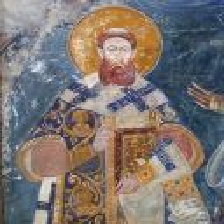

In [49]:
# file path
filepath = os.path.join("in", "Orthodox_Churches", "Frescoes", "fresco99.jpg")

# load image using tf.keras
img = image.load_img(filepath, target_size=(224, 224, 3))

# display image
img

In [52]:
# convert image to array
x = image.img_to_array(img)
# convert to rank 4 tensor
x = np.expand_dims(x, axis=0)
# preprocess to be in line with VGG16 data 
x = preprocess_input(x)

# make predictions
#preds = mpimg.imread(filenames[idxs[0]])
preds = idxs

In [54]:
with tf.GradientTape() as tape:
    # make sure the name here corresponds to the final conv layer in your network
    last_conv_layer = model.get_layer('block3_conv3')
    
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions    
    iterate = tf.keras.models.Model([model.inputs], 
                                    [model.output, last_conv_layer.output])
    
    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    #model_out, last_conv_layer = iterate(x)
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    
    # This is the gradient of the output neuron of the last conv layer
    grads = tape.gradient(class_out, 
                          last_conv_layer)
    # Vector of mean intensity of the gradient over a specific feature map channel
    pooled_grads = K.mean(grads, 
                          axis=(0, 1, 2))

In [55]:
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), 
                         axis=-1)

In [56]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((14,14)) # a very small vis, where everything is compressed down to 14x14 pixels. 
plt.matshow(heatmap)
plt.show()

ValueError: cannot reshape array of size 3136 into shape (14,14)